# Time Interval for Airports delivering

In our machine learning project analyzing global airports, we focused on studying the created and updated times of airport data, exploring the time intervals between these events. By examining the time intervals, we gained insights into the dynamics and evolution of airport information. The analysis involved calculating various metrics, such as average time interval, standard deviation, and trends over time. These findings provided valuable information about the frequency of updates, patterns of data maintenance, and potential correlations with external factors. By leveraging machine learning techniques, we aimed to uncover underlying patterns in the temporal dynamics of airport data, enabling us to make informed decisions and improve the accuracy and reliability of our models.

###### Importing Libraries

In [800]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')

%matplotlib inline


###### Importing data set

In [801]:
df = pd.read_csv('C:\\Users\\Galaxy Computers\\Desktop\\Projepafka\\global_airports_3.csv')

In [802]:
df.head()

,location,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,...,lastcheckdate,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomattr_data,rwwidthm,location_2
0,POINT(-85.295502 9.81112),La Javilla,La Javilla Airport,NaN,,MLLJ,,Airstrip,Unspecified,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-12T09:30:14.627Z,3623378.0,NaN,NaN,POINT(-85.2955 9.81112)
1,POINT(3.32214 6.57853),Murtala Muhammed,Murtala Muhammed,NaN,Lagos,DNMM,LOS,Airport,International,Civil/Military,...,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,2332459.0,NaN,NaN,POINT(3.32214 6.57853)
2,POINT(6.01528 9.10347),Bida,Bida Airport,NaN,Bida,DNBI,NaN,Airstrip,Domestic,Civil,...,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,2347209.0,NaN,NaN,POINT(6.01528 9.10347)
3,POINT(4.48545 9.89267),Kainji,Kainji,NaN,NaN,DNIX,NaN,Airfield,Domestic,Military,...,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,NaN,NaN,NaN,POINT(4.48545 9.89267)
4,POINT(7.66 13.008),Katsina,Katsina,NaN,Katsina,NaN,NaN,Airfield,Domestic,Civil,...,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,2334802.0,NaN,NaN,POINT(7.66 13.008)


In [803]:
df.tail()

,location,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,...,lastcheckdate,remarks,url_lca,source,createdate,updatedate,geonameid,gdb_geomattr_data,rwwidthm,location_2
6442,POINT(-83.735446 9.157537),Papa Kilo,Papa Kilo Airport,NaN,,MRPK,,Airstrip,Unspecified,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-16T08:45:50.249Z,999999999.0,NaN,NaN,POINT(-83.73545 9.15754)
6443,POINT(-83.5149 10.569),Barra del To,Barra del Tortuguero,NaN,,MRBT,,Airstrip,Unspecified,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-16T08:57:34.864Z,999999999.0,NaN,NaN,POINT(-83.5149 10.569)
6444,POINT(-84.209 9.457777),Aerodamas,Aerodamas Airport,NaN,,MRAD,,Airstrip,Unspecified,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-16T09:11:20.027Z,999999999.0,NaN,NaN,POINT(-84.209 9.45778)
6445,POINT(-83.432999 8.64999),Playa Blanca (J. W. Berteus),Playa Blanca (J. W. Berteus) Airport,NaN,,MRPB,,Airstrip,Unspecified,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-16T09:23:03.455Z,999999999.0,NaN,NaN,POINT(-83.433 8.64999)
6446,POINT(-85.016197 10.8922),Upala,Upala Airport,NaN,Upala,MRUP,UPL,Airport,Domestic,,...,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-14T07:51:58.996Z,7730115.0,NaN,12.0,POINT(-85.0162 10.8922)


### Pre-prosessing Data

###### Spearating data between numeric and catagoric

In [804]:
len(df)

6447

In [805]:
len(df.columns)

35

In [806]:
df.dtypes

location              object
nameshort             object
namelong              object
namealt               object
city                  object
icao                  object
iata                  object
apttype               object
aptclass              object
authority             object
status                object
dmg                   object
rwpaved               object
rwlengthm            float64
rwlengthf            float64
elevm                float64
elevf                float64
humuse                object
humoperatedby         object
locprecision          object
latitude             float64
longitude            float64
iso3                  object
iso3_op               object
country               object
lastcheckdate         object
remarks               object
url_lca               object
source                object
createdate            object
updatedate            object
geonameid            float64
gdb_geomattr_data    float64
rwwidthm             float64
location_2    

In [807]:
categorical_variables = df.select_dtypes(include=['object']).columns
numerical_variables = df.select_dtypes(exclude=['object']).columns

In [808]:
categorical_variables

Index(['location', 'nameshort', 'namelong', 'namealt', 'city', 'icao', 'iata',
       'apttype', 'aptclass', 'authority', 'status', 'dmg', 'rwpaved',
       'humuse', 'humoperatedby', 'locprecision', 'iso3', 'iso3_op', 'country',
       'lastcheckdate', 'remarks', 'url_lca', 'source', 'createdate',
       'updatedate', 'location_2'],
      dtype='object')

In [809]:
numerical_variables

Index(['rwlengthm', 'rwlengthf', 'elevm', 'elevf', 'latitude', 'longitude',
       'geonameid', 'gdb_geomattr_data', 'rwwidthm'],
      dtype='object')

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6447 entries, 0 to 6446
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           6437 non-null   object 
 1   nameshort          6394 non-null   object 
 2   namelong           6391 non-null   object 
 3   namealt            171 non-null    object 
 4   city               3828 non-null   object 
 5   icao               3649 non-null   object 
 6   iata               2746 non-null   object 
 7   apttype            6439 non-null   object 
 8   aptclass           6439 non-null   object 
 9   authority          6428 non-null   object 
 10  status             6442 non-null   object 
 11  dmg                6381 non-null   object 
 12  rwpaved            6440 non-null   object 
 13  rwlengthm          1149 non-null   float64
 14  rwlengthf          1096 non-null   float64
 15  elevm              2861 non-null   float64
 16  elevf              2907 

In [811]:
df.select_dtypes(exclude=['object']).isnull().sum()

rwlengthm            5298
rwlengthf            5351
elevm                3586
elevf                3540
latitude                0
longitude               0
geonameid            1394
gdb_geomattr_data    6447
rwwidthm             6303
dtype: int64

##### Cleaning numeric  value

In [812]:
df_numneric = df[['latitude','longitude','geonameid']]

In [813]:
df_numneric.head()

,latitude,longitude,geonameid
0,9.81112,-85.29550,3623378.0
1,6.57853,3.32214,2332459.0
2,9.10347,6.01528,2347209.0
3,9.89267,4.48545,NaN
4,13.00800,7.66000,2334802.0


In [814]:
df_numneric.describe()

,latitude,longitude,geonameid
count,6447.000000,6447.000000,5.053000e+03
mean,10.718928,22.391984,5.601906e+07
std,20.705912,78.283088,2.269316e+08
min,-54.931070,-179.876790,0.000000e+00
25%,-3.994250,-66.835000,9.785500e+04
50%,9.006390,29.617170,1.127110e+06
75%,25.987590,73.803920,2.460755e+06
max,82.521730,179.950970,1.000000e+09


In [815]:
mean_value = df_numneric['geonameid'].mean()
df_numneric['geonameid'].fillna(mean_value, inplace=True)

In [816]:
df_numneric

,latitude,longitude,geonameid
0,9.81112,-85.29550,3.623378e+06
1,6.57853,3.32214,2.332459e+06
2,9.10347,6.01528,2.347209e+06
3,9.89267,4.48545,5.601906e+07
4,13.00800,7.66000,2.334802e+06
...,...,...,...
6442,9.15754,-83.73545,1.000000e+09
6443,10.56900,-83.51490,1.000000e+09
6444,9.45778,-84.20900,1.000000e+09
6445,8.64999,-83.43300,1.000000e+09


##### Cleaning catagoric  features

In [817]:
df.select_dtypes(include=['object']).isnull().sum()

location           10
nameshort          53
namelong           56
namealt          6276
city             2619
icao             2798
iata             3701
apttype             8
aptclass            8
authority          19
status              5
dmg                66
rwpaved             7
humuse             78
humoperatedby    5936
locprecision      140
iso3               41
iso3_op          1999
country            45
lastcheckdate    3873
remarks          6101
url_lca          6440
source           4073
createdate          0
updatedate          0
location_2          0
dtype: int64

In [818]:
df_catagoric = df.select_dtypes(include=['object'])

In [819]:
df_catagoric.head()

,location,nameshort,namelong,namealt,city,icao,iata,apttype,aptclass,authority,...,iso3,iso3_op,country,lastcheckdate,remarks,url_lca,source,createdate,updatedate,location_2
0,POINT(-85.295502 9.81112),La Javilla,La Javilla Airport,NaN,,MLLJ,,Airstrip,Unspecified,,...,CRI,CRI,Costa Rica,2018-05-10T22:00:00Z,NaN,NaN,NaN,2018-05-10T22:00:00Z,2018-05-12T09:30:14.627Z,POINT(-85.2955 9.81112)
1,POINT(3.32214 6.57853),Murtala Muhammed,Murtala Muhammed,NaN,Lagos,DNMM,LOS,Airport,International,Civil/Military,...,NGA,NaN,Nigeria,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,POINT(3.32214 6.57853)
2,POINT(6.01528 9.10347),Bida,Bida Airport,NaN,Bida,DNBI,NaN,Airstrip,Domestic,Civil,...,NGA,NaN,Nigeria,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,POINT(6.01528 9.10347)
3,POINT(4.48545 9.89267),Kainji,Kainji,NaN,NaN,DNIX,NaN,Airfield,Domestic,Military,...,NGA,NaN,Nigeria,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,POINT(4.48545 9.89267)
4,POINT(7.66 13.008),Katsina,Katsina,NaN,Katsina,NaN,NaN,Airfield,Domestic,Civil,...,NGA,NaN,Nigeria,NaN,NaN,NaN,NaN,2013-05-13T22:00:00Z,2016-12-02T10:25:58Z,POINT(7.66 13.008)


###### Cleaning date columns and making new column

In [820]:
df_catagoric['createdate'] = df_catagoric['createdate'].apply(lambda x: x[:10])
df_catagoric['updatedate'] = df_catagoric['updatedate'].apply(lambda x: x[:10])

In [821]:
df_catagoric[['createdate','updatedate']].head()

,createdate,updatedate
0,2018-05-10,2018-05-12
1,2013-05-13,2016-12-02
2,2013-05-13,2016-12-02
3,2013-05-13,2016-12-02
4,2013-05-13,2016-12-02


In [822]:
df_catagoric['createdate'] = pd.to_datetime(df_catagoric['createdate'])
df_catagoric['updatedate'] = pd.to_datetime(df_catagoric['updatedate'])
df_catagoric['time_interval'] = df_catagoric['updatedate'] - df_catagoric['createdate']
df_catagoric['time_interval'].head()

0      2 days
1   1299 days
2   1299 days
3   1299 days
4   1299 days
Name: time_interval, dtype: timedelta64[ns]

In [823]:
#To remove the word "days" from the values in the 'time_interval' column

df_catagoric['time_interval'] = df_catagoric['time_interval'].astype(str)
df_catagoric['time_interval'] = df_catagoric['time_interval'].str.replace(' days', '')
df_catagoric[['createdate','updatedate','time_interval']].head()

,createdate,updatedate,time_interval
0,2018-05-10,2018-05-12,2
1,2013-05-13,2016-12-02,1299
2,2013-05-13,2016-12-02,1299
3,2013-05-13,2016-12-02,1299
4,2013-05-13,2016-12-02,1299


###### Droping some dummy and unnecessary features 

In [824]:
 df_catagoric.drop(['namealt', 'icao','iata','humoperatedby',
                    'lastcheckdate','remarks','url_lca','source','location','namelong',
                   'iso3','iso3_op','location_2','createdate','updatedate','nameshort',
                   'city','dmg','rwpaved','locprecision'], axis=1, inplace=True)

In [825]:
df_catagoric.head()

,apttype,aptclass,authority,status,humuse,country,time_interval
0,Airstrip,Unspecified,,Open,,Costa Rica,2
1,Airport,International,Civil/Military,Open,No,Nigeria,1299
2,Airstrip,Domestic,Civil,Open,No,Nigeria,1299
3,Airfield,Domestic,Military,Unknown,No,Nigeria,1299
4,Airfield,Domestic,Civil,Open,No,Nigeria,1299


In [826]:
df_catagoric['country'].value_counts()

Colombia             698
Papua New Guinea     498
Indonesia            205
Bolivia              180
South Sudan          159
                    ... 
Montserrat             1
Antigua & Barbuda      1
Madeira Islands        1
Palmyra Atoll          1
Hong Kong              1
Name: country, Length: 222, dtype: int64

In [827]:
country_counts = df_catagoric['country'].value_counts()
countries_above_50 = country_counts[country_counts > 50]
countries_above_50

Colombia                            698
Papua New Guinea                    498
Indonesia                           205
Bolivia                             180
South Sudan                         159
United States of America            142
Democratic Republic of the Congo    137
Madagascar                          135
Costa Rica                          133
Sudan                               130
Haiti                               117
Ukraine                             113
Turkey                              110
Philippines                         110
South Africa                        104
Japan                               101
India                                92
Myanmar                              88
Ecuador                              83
Iran (Islamic Republic of)           81
Kenya                                73
Iraq                                 73
Nepal                                72
Saudi Arabia                         70
Egypt                                69


In [828]:
#For our analyzing we remove some contries which there are number of little
country_counts = df_catagoric['country'].value_counts()
countries_below_50 = country_counts[country_counts < 50]
countries_to_drop = countries_below_50.index

mapping_dict = {country: float('nan') for country in countries_to_drop}

df_catagoric['country'] = df_catagoric['country'].replace(mapping_dict)

In [829]:
df_catagoric['country']

0       Costa Rica
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6442    Costa Rica
6443    Costa Rica
6444    Costa Rica
6445    Costa Rica
6446    Costa Rica
Name: country, Length: 6447, dtype: object

In [830]:
df_catagoric['humuse'].value_counts()

No                       4338
Unknown                  1377
Connection                198
Yes                       131
                          129
Closed                     95
Upon Request               52
Hub                        35
Planned                     8
Potential                   5
Stand by Capacity Hub       1
Name: humuse, dtype: int64

In [831]:
humuse_counts = df_catagoric['humuse'].value_counts()
humuse_below_50 = humuse_counts[humuse_counts < 50]
humuse_to_drop = humuse_below_50.index

mapping_dict = {humuse: float('nan') for humuse in humuse_to_drop}

df_catagoric['humuse'] = df_catagoric['humuse'].replace(mapping_dict)

###### Replacing Unknown and empyt values as NaN

In [832]:
df_catagoric.replace('Unknown', np.NaN, inplace=True)

In [833]:
df_catagoric.replace(' ', np.NaN, inplace=True)

In [834]:
df_catagoric.head()

,apttype,aptclass,authority,status,humuse,country,time_interval
0,Airstrip,Unspecified,NaN,Open,NaN,Costa Rica,2
1,Airport,International,Civil/Military,Open,No,NaN,1299
2,Airstrip,Domestic,Civil,Open,No,NaN,1299
3,Airfield,Domestic,Military,NaN,No,NaN,1299
4,Airfield,Domestic,Civil,Open,No,NaN,1299


###### Cleaning NaN values 

In [835]:
column_headers = df_catagoric.columns.tolist()

cleaner = SimpleImputer(strategy='most_frequent')

transformed_data = cleaner.fit_transform(df_catagoric)

# Create a new DataFrame with transformed values
DF_catagoric = pd.DataFrame(transformed_data, columns=column_headers)

In [836]:
DF_catagoric

,apttype,aptclass,authority,status,humuse,country,time_interval
0,Airstrip,Unspecified,Civil,Open,No,Costa Rica,2
1,Airport,International,Civil/Military,Open,No,Colombia,1299
2,Airstrip,Domestic,Civil,Open,No,Colombia,1299
3,Airfield,Domestic,Military,Open,No,Colombia,1299
4,Airfield,Domestic,Civil,Open,No,Colombia,1299
...,...,...,...,...,...,...,...
6442,Airstrip,Unspecified,Civil,Open,No,Costa Rica,6
6443,Airstrip,Unspecified,Civil,Open,No,Costa Rica,6
6444,Airstrip,Unspecified,Civil,Open,No,Costa Rica,6
6445,Airstrip,Unspecified,Civil,Closed,No,Costa Rica,6


In [837]:
data['time_interval'] = data['time_interval'].astype(int)

In [838]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6447 entries, 0 to 6446
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       6447 non-null   float64
 1   longitude      6447 non-null   float64
 2   geonameid      6447 non-null   float64
 3   apttype        6447 non-null   int32  
 4   aptclass       6447 non-null   int32  
 5   authority      6447 non-null   int32  
 6   status         6447 non-null   int32  
 7   humuse         6447 non-null   int32  
 8   country        6447 non-null   int32  
 9   time_interval  6447 non-null   int32  
dtypes: float64(3), int32(7)
memory usage: 327.5 KB


###### Encoding Catagorical Features

In [839]:
label_encoder = LabelEncoder()

columns_to_encode = ['apttype', 'aptclass', 'authority', 'status', 'country', 'humuse']

for column in columns_to_encode:
    DF_catagoric[column] = label_encoder.fit_transform(DF_catagoric[column])


###### Concat two different datframe

In [840]:
numeric = df_numneric.reset_index(drop=True)
catog = DF_catagoric.reset_index(drop=True)
data = pd.concat([numeric, catog], axis=1)

In [841]:
data.head()

,latitude,longitude,geonameid,apttype,aptclass,authority,status,humuse,country,time_interval
0,9.81112,-85.29550,3.623378e+06,2,3,0,1,2,7,2
1,6.57853,3.32214,2.332459e+06,1,2,2,1,2,6,1299
2,9.10347,6.01528,2.347209e+06,2,0,0,1,2,6,1299
3,9.89267,4.48545,5.601906e+07,0,0,4,1,2,6,1299
4,13.00800,7.66000,2.334802e+06,0,0,0,1,2,6,1299


In [842]:
Data = data.copy()

In [843]:
x = Data.iloc[:,0:9]
y = Data.iloc[:,9]

###### Power transform

With standardization

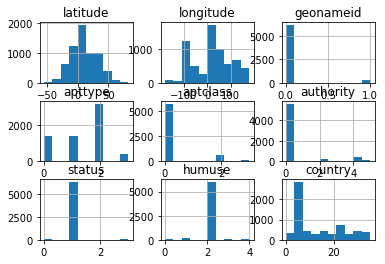

In [844]:
hist = x.hist()

In [845]:
col_names = x.columns

In [846]:
transformer = QuantileTransformer(output_distribution='normal')
transformed_array = transformer.fit_transform(x)

data_transformed = pd.DataFrame(transformed_array, columns=x.columns)

In [847]:
data_transformed.head()

,latitude,longitude,geonameid,apttype,aptclass,authority,status,humuse,country
0,0.062653,-1.671450,0.387542,0.483658,5.199338,-5.199338,0.013801,0.021329,0.017565
1,-0.142848,-0.424905,0.137221,-0.445919,1.525529,1.258508,0.013801,0.021329,-0.568686
2,0.008798,-0.411972,0.144779,0.483658,-5.199338,-5.199338,0.013801,0.021329,-0.568686
3,0.068890,-0.421180,1.033647,-5.199338,-5.199338,1.644369,0.013801,0.021329,-0.568686
4,0.241817,-0.398907,0.138307,-5.199338,-5.199338,-5.199338,0.013801,0.021329,-0.568686


(array([[1.000e+00, 6.000e+00, 1.160e+02, 8.390e+02, 2.259e+03, 2.264e+03,
         8.400e+02, 1.160e+02, 5.000e+00, 1.000e+00],
        [1.403e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.419e+03, 3.197e+03,
         0.000e+00, 0.000e+00, 0.000e+00, 4.280e+02]]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 2 BarContainer objects>)

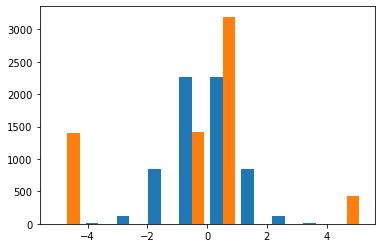

In [848]:
plt.hist(data_transformed[['latitude','apttype']])

(array([  58.,    0.,   55.,  357., 2732., 2314.,  738.,  142.,    0.,
          51.]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

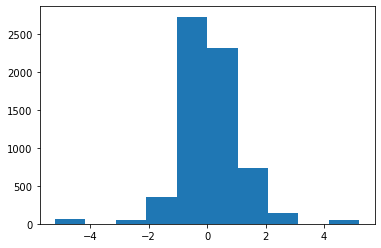

In [849]:
plt.hist(data_transformed['country'])

###### Separating Output and Input

In [850]:
X = data_transformed.copy()

In [851]:
X.head()

,latitude,longitude,geonameid,apttype,aptclass,authority,status,humuse,country
0,0.062653,-1.671450,0.387542,0.483658,5.199338,-5.199338,0.013801,0.021329,0.017565
1,-0.142848,-0.424905,0.137221,-0.445919,1.525529,1.258508,0.013801,0.021329,-0.568686
2,0.008798,-0.411972,0.144779,0.483658,-5.199338,-5.199338,0.013801,0.021329,-0.568686
3,0.068890,-0.421180,1.033647,-5.199338,-5.199338,1.644369,0.013801,0.021329,-0.568686
4,0.241817,-0.398907,0.138307,-5.199338,-5.199338,-5.199338,0.013801,0.021329,-0.568686


In [852]:
Data['time_interval'] = Data['time_interval'].astype(int)

In [853]:
y.shape

(6447,)

In [854]:
y = y.values.reshape(-1, 1)

In [855]:
y.shape

(6447, 1)

###### Correlation

In [856]:

correlation_matrix = Data.corr()

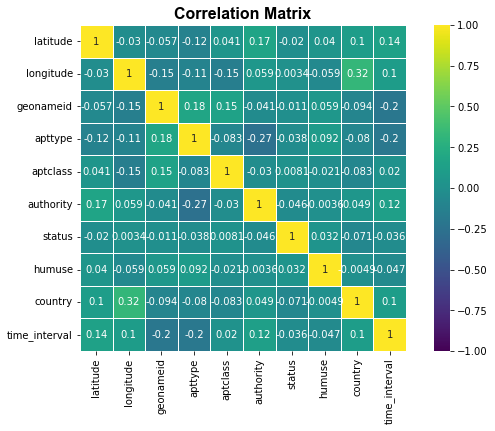

In [857]:
font_title = {'fontsize': 16, 'fontweight': 'bold', 'fontfamily': 'Arial'}

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)

plt.show()

###### Feature selection using mutual information

In [858]:
selector = SelectKBest(lambda X,y : mutual_info_regression(X,y, discrete_features=True),k = 5)

In [859]:
selector.fit_transform(X,y)

array([[ 0.06265313, -1.67144966,  0.38754213,  0.48365797,  0.01756487],
       [-0.14284844, -0.42490537,  0.13722066, -0.44591914, -0.56868553],
       [ 0.0087984 , -0.41197244,  0.14477866,  0.48365797, -0.56868553],
       ...,
       [ 0.03665008, -1.6025801 ,  5.19933758,  0.48365797,  0.01756487],
       [-0.02156605, -1.52773464,  5.19933758,  0.48365797,  0.01756487],
       [ 0.14418077, -1.65446326,  0.62109914, -0.44591914,  0.01756487]])

In [860]:
X.columns[selector.get_support()]

Index(['latitude', 'longitude', 'geonameid', 'apttype', 'country'], dtype='object')

In [861]:
X = X[X.columns[selector.get_support()]]

In [862]:
X.shape

(6447, 5)

In [863]:
y.shape

(6447, 1)

In [864]:
X.head()

,latitude,longitude,geonameid,apttype,country
0,0.062653,-1.671450,0.387542,0.483658,0.017565
1,-0.142848,-0.424905,0.137221,-0.445919,-0.568686
2,0.008798,-0.411972,0.144779,0.483658,-0.568686
3,0.068890,-0.421180,1.033647,-5.199338,-0.568686
4,0.241817,-0.398907,0.138307,-5.199338,-0.568686


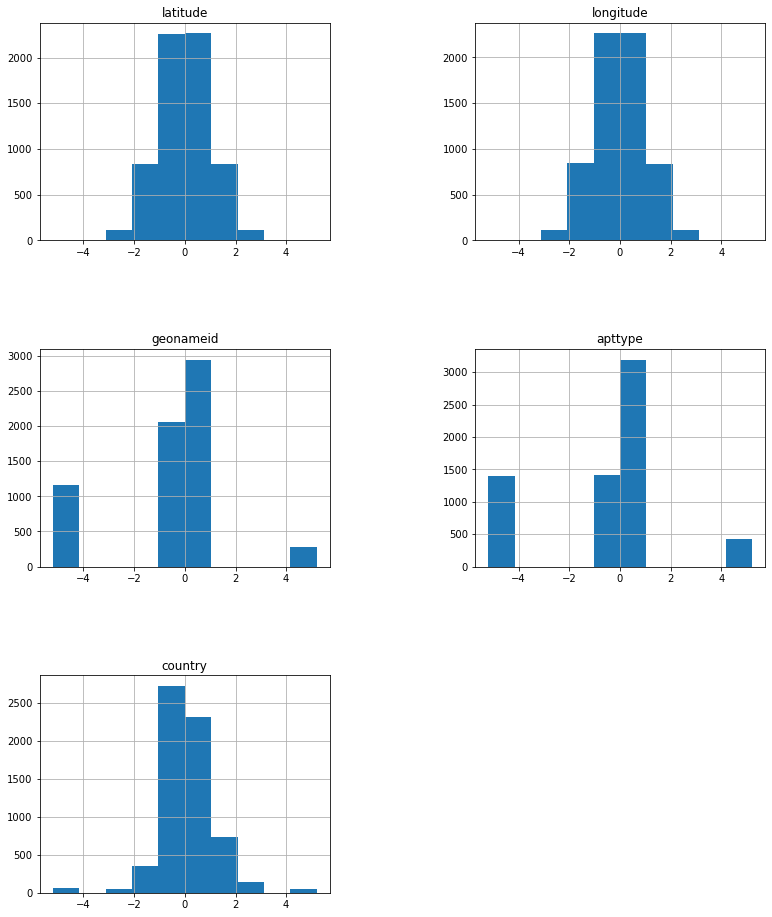

In [865]:
X.hist(column=X.columns,figsize=(13,16))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

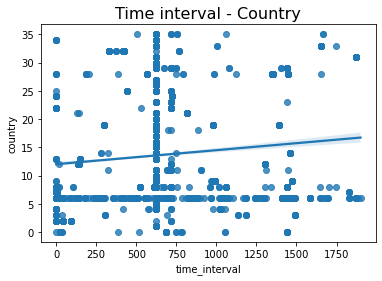

In [866]:
plt.title('Time interval - Country', fontsize=16)

sns.regplot(x=Data.time_interval, y=Data.country)

plt.show()

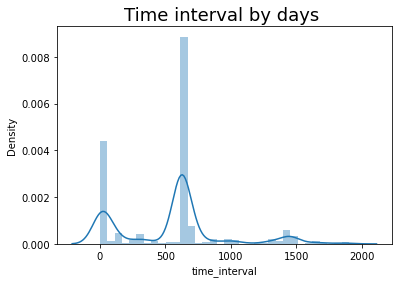

In [867]:
plt.title('Time interval by days ', fontsize=18)
sns.distplot(Data.time_interval)

plt.show()